In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl



%store -r Spo_Clean_Data

%store -r Spo_Data

Spo_Clean_Data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year,day,month
0,0.995,4880,0.708,0.028442,0.1950,0,0.563,10,0.1510,0.745000,1,0.00,0.0506,0.485348,0.7790,1928,1,1
1,0.994,25163,0.379,0.051316,0.0135,0,0.901,8,0.0763,0.494026,1,0.00,0.0462,0.344019,0.0767,1928,1,1
2,0.604,26351,0.749,0.018374,0.2200,0,0.000,5,0.1190,0.627609,0,0.00,0.9290,0.439086,0.8800,1928,1,1
3,0.995,9738,0.781,0.032538,0.1300,0,0.887,1,0.1110,0.708887,0,0.00,0.0926,0.442470,0.7200,1928,25,9
4,0.990,10245,0.210,0.126450,0.2040,0,0.908,11,0.0980,0.676079,1,0.01,0.0424,0.254614,0.0693,1928,1,1


In [3]:
Spo_Data.groupby(["mode" , "key"])["popularity"].mean()


mode  key
0     0      29.121667
      1      38.175475
      2      27.521559
      3      28.761965
      4      34.174586
      5      30.420311
      6      37.694821
      7      28.770787
      8      34.490385
      9      32.915916
      10     33.600941
      11     35.456159
1     0      31.225350
      1      33.580017
      2      33.117899
      3      23.314990
      4      32.409233
      5      27.650991
      6      32.641608
      7      31.906789
      8      29.713910
      9      33.277764
      10     26.893159
      11     33.924113
Name: popularity, dtype: float64

In [5]:
Spo_Clean_Data.groupby(["month"])["popularity"].mean()

month
1     0.249088
2     0.410828
3     0.409145
4     0.424634
5     0.429527
6     0.404876
7     0.383070
8     0.414713
9     0.419573
10    0.419076
11    0.396811
12    0.212638
Name: popularity, dtype: float64

In [6]:
Spo_Data.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,169909.000000,169909.000000,1.699090e+05,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000
mean,0.493214,0.538150,2.314062e+05,0.488593,0.084863,0.161937,5.200519,0.206690,-11.370289,0.708556,31.556610,0.094058,116.948017,0.532095,1977.223231
std,0.376627,0.175346,1.213219e+05,0.267390,0.278679,0.309329,3.515257,0.176796,5.666765,0.454429,21.582614,0.149937,30.726937,0.262408,25.593168
min,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1921.000000
25%,0.094500,0.417000,1.710400e+05,0.263000,0.000000,0.000000,2.000000,0.098400,-14.470000,0.000000,12.000000,0.034900,93.516000,0.322000,1957.000000
50%,0.492000,0.548000,2.086000e+05,0.481000,0.000000,0.000204,5.000000,0.135000,-10.474000,1.000000,33.000000,0.045000,114.778000,0.544000,1978.000000
75%,0.888000,0.667000,2.629600e+05,0.710000,0.000000,0.086800,8.000000,0.263000,-7.118000,1.000000,48.000000,0.075400,135.712000,0.749000,1999.000000
max,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.969000,244.091000,1.000000,2020.000000


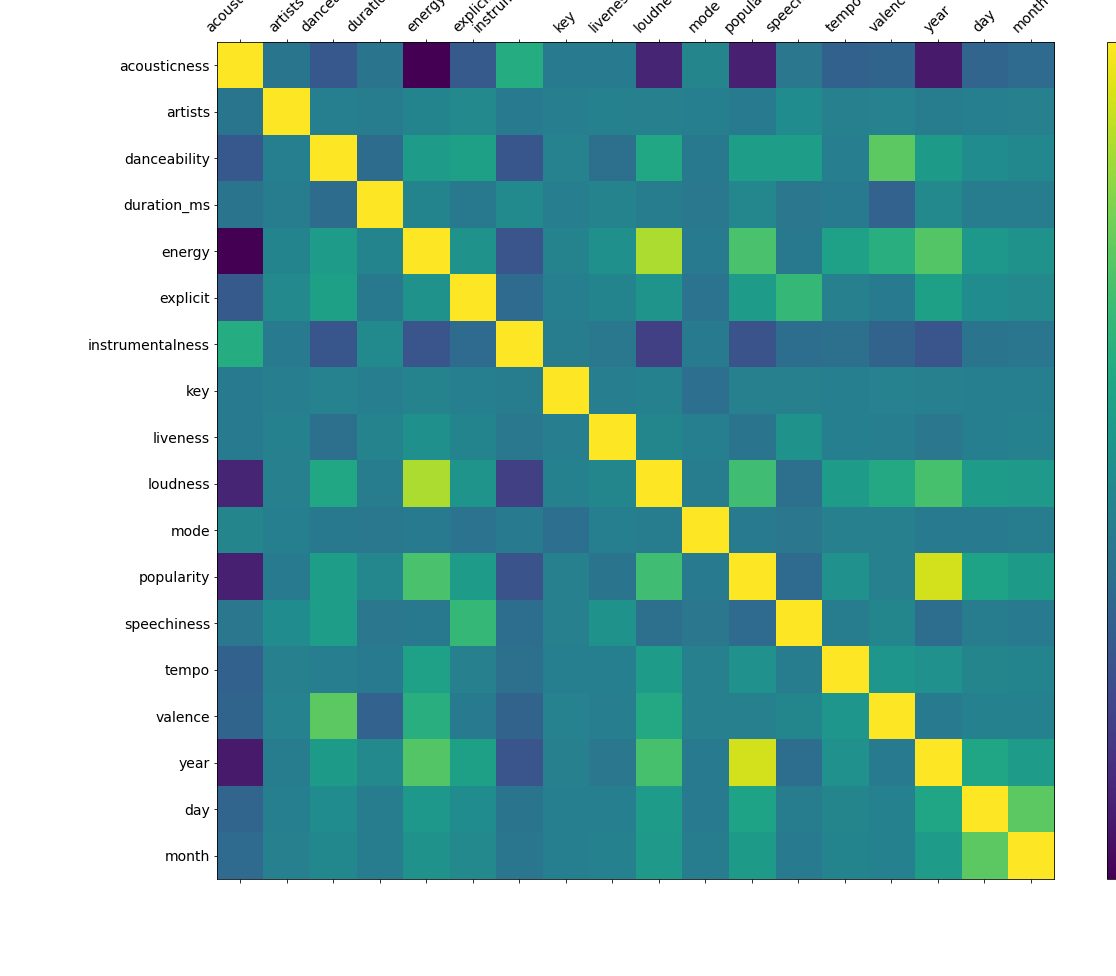

In [7]:
f = plt.figure(figsize=(19, 15))
plt.matshow(Spo_Clean_Data.corr(), fignum=f.number)
plt.xticks(range(Spo_Clean_Data.shape[1]), Spo_Clean_Data.columns, fontsize=14, rotation=45)
plt.yticks(range(Spo_Clean_Data.shape[1]), Spo_Clean_Data.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

Text(0, 0.5, 'Rate')

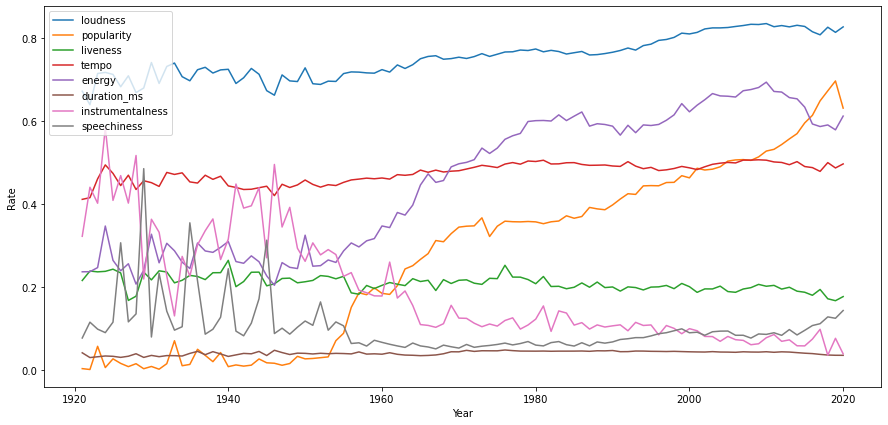

In [8]:
fig, ax = plt.subplots(figsize=(15,7))

Spo_Clean_Data.groupby(['year']).mean()['loudness'].plot(label="loudness" , ax=ax )
Spo_Clean_Data.groupby(['year']).mean()['popularity'].plot(ax=ax , label="popularity")
Spo_Clean_Data.groupby(['year']).mean()['liveness'].plot(ax=ax , label="liveness")
Spo_Clean_Data.groupby(['year']).mean()['tempo'].plot(ax=ax , label="tempo")
Spo_Clean_Data.groupby(['year']).mean()['energy'].plot(ax=ax , label="energy")
Spo_Clean_Data.groupby(['year']).mean()['duration_ms'].plot(ax=ax , label="duration_ms")
Spo_Clean_Data.groupby(['year']).mean()['instrumentalness'].plot(ax=ax , label="instrumentalness")
Spo_Clean_Data.groupby(['year']).mean()['speechiness'].plot(ax=ax , label="speechiness")

ax.legend(loc='best')

plt.xlabel("Year")
plt.ylabel("Rate")





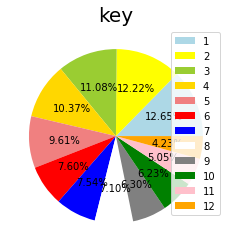

In [16]:
plt.pie(Spo_Clean_Data['key'].value_counts(),
colors = ['lightblue', 'yellow' , 'yellowgreen', 'gold', 'lightcoral', 'red' ,'blue' , 'white' , 'gray' , 'green', 'pink', 'orange'],
autopct = '%.2f%%',
),
plt.title('key', fontsize = 20)

labels = ['1' , '2' , '3' , '4' , '5' , '6' , '7' , '8' , '9' , '10' , '11' ,'12']
plt.legend(labels, loc="best")
plt.axis('off')
plt.show()

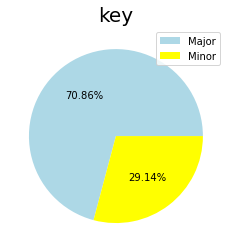

In [30]:
plt.pie(Spo_Clean_Data['mode'].value_counts(),
colors = ['lightblue', 'yellow'],
autopct = '%.2f%%',
),
plt.title('key', fontsize = 20)

labels = ['Major' , 'Minor']
plt.legend(labels, loc="best")
plt.axis('off')
plt.show()

Text(0, 0.5, 'Count')

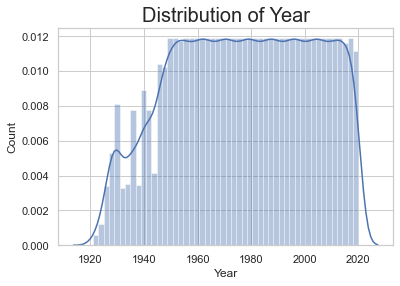

In [110]:
sns.set(style = 'whitegrid')
sns.distplot(Spo_Data['year'])
plt.title('Distribution of Year', fontsize = 20)
plt.xlabel('Year')
plt.ylabel('Count')
